参考资料：
https://cloud.tencent.com/developer/article/2318551
https://zhuanlan.zhihu.com/p/142320349
https://www.woshipm.com/data-analysis/4342849.html
https://study.sf.163.com/documents/read/manual/skills06

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates

In [3]:
data = pd.read_csv('希忘更新.csv')

In [4]:
date = [datetime.strptime(d, '%Y/%m/%d').date() for d in data['日期']]

In [5]:
# 中文乱码问题
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

In [6]:
from matplotlib import font_manager
# font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

## 查看原始序列

In [7]:
importantDay = datetime.strptime('2023/9/27', '%Y/%m/%d').date()

findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
C:\Users\YUNYU\AppData\Local\Temp\ipykernel_11868\211152865.py:17: UserWarning: Glyph 38144 (\N{CJK UNIFIED IDEOGRAPH-9500}) missing from current font.
  plt.savefig('E:/the economist/小项目/数字专辑-华晨宇/withOutliers.eps',format='eps')
C:\Users\YUNYU\AppData\Local\Temp\ipykernel_11868\211152865.py:17: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig('E:/the economist/小项目/数字专辑-华晨宇/withOutliers.eps',format='eps')
C:\Users\YUNYU\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38144 (\N{CJK UNIFIED IDEOGRAPH-9500}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\YUNYU\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font

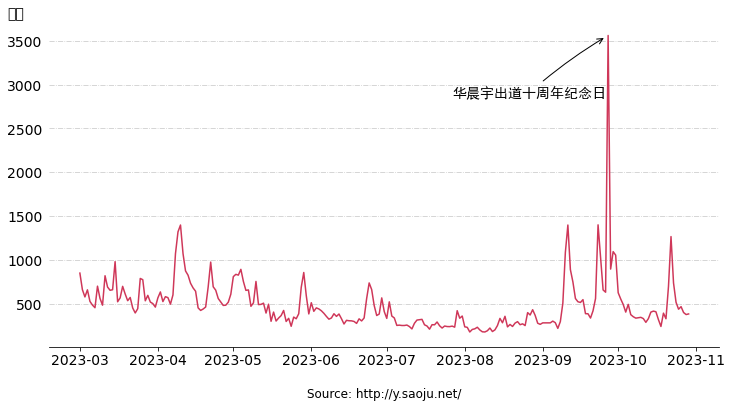

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(date, data['当日销量（张）'], c='#cf3759')
# plt.scatter(datetime(2023, 9, 27), data['当日销量（张）'].max(), c='red',  s=100)
plt.annotate('华晨宇出道十周年纪念日', 
             xy = (datetime(2023, 9, 27), data['当日销量（张）'].max()), 
             xytext=(datetime(2023, 7, 27),0.8*data['当日销量（张）'].max()),
             arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=-0.05",
                    color="k", shrinkA=5, shrinkB=5), fontsize=14)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.yticks(fontsize=14, fontname="Roboto")
plt.xticks(fontsize=14, fontname="Roboto")
plt.tick_params(left = False) #去除y轴小点
plt.gca().set_ylabel('销量', ha='left', y=1, rotation=0, labelpad=0, fontsize=14, fontname="Roboto")
plt.gca().set_xlabel('Source: http://y.saoju.net/', rotation=0, labelpad=20, fontsize=12, fontname="Roboto")
plt.gca().spines[['right', 'top','left']].set_visible(False)
plt.grid(linestyle='-.',axis='y',color='#ccc')
plt.savefig('withOutliers.eps',format='eps')
plt.show()

## 去除异常值

C:\Users\YUNYU\AppData\Local\Temp\ipykernel_11868\1909686136.py:31: UserWarning: Glyph 38144 (\N{CJK UNIFIED IDEOGRAPH-9500}) missing from current font.
  plt.savefig('E:/the economist/小项目/数字专辑-华晨宇/withoutOutliers.eps',format='eps')
C:\Users\YUNYU\AppData\Local\Temp\ipykernel_11868\1909686136.py:31: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig('E:/the economist/小项目/数字专辑-华晨宇/withoutOutliers.eps',format='eps')
C:\Users\YUNYU\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38144 (\N{CJK UNIFIED IDEOGRAPH-9500}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\YUNYU\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


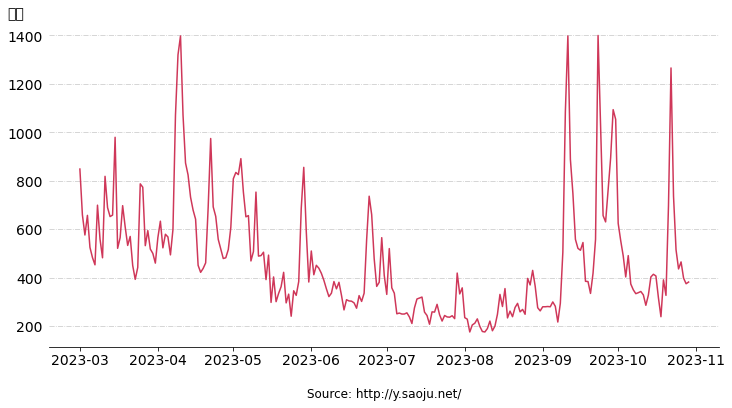

In [9]:
z_scores = (data['当日销量（张）'] - data['当日销量（张）'].mean()) /data['当日销量（张）'].std()
 
 # Define a threshold for outlier detection
threshold = 3
 
 # Identify outliers
outliers = data[np.abs(z_scores) > threshold]
 
 # Remove outliers from the data
data_out = data.drop(outliers.index)

date_out = [datetime.strptime(d, '%Y/%m/%d').date() for d in data_out['日期']]
 
 # Plot the data without outliers
plt.figure(figsize=(12, 6))
plt.plot(date_out, data_out['当日销量（张）'], c='#cf3759')
# plt.scatter(datetime(2023, 9, 27), data['当日销量（张）'].max(), c='red',  s=100)
plt.annotate('华晨宇出道十周年纪念日', 
             xy = (datetime(2023, 9, 27), data['当日销量（张）'].max()), 
             xytext=(datetime(2023, 7, 27),0.8*data['当日销量（张）'].max()),
             arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=-0.05",
                    color="k", shrinkA=5, shrinkB=5), fontsize=14)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.yticks(fontsize=14, fontname="Roboto")
plt.xticks(fontsize=14, fontname="Roboto")
plt.tick_params(left = False) #去除y轴小点
plt.gca().set_ylabel('销量', ha='left', y=1, rotation=0, labelpad=0, fontsize=14, fontname="Roboto")
plt.gca().set_xlabel('Source: http://y.saoju.net/', rotation=0, labelpad=20, fontsize=12, fontname="Roboto")
plt.gca().spines[['right', 'top','left']].set_visible(False)
plt.grid(linestyle='-.',axis='y',color='#ccc')
plt.savefig('withoutOutliers.eps',format='eps')
plt.show()

## Z score

In [9]:
z_scores = (data_out['当日销量（张）'] - data_out['当日销量（张）'].mean()) /data_out['当日销量（张）'].std()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


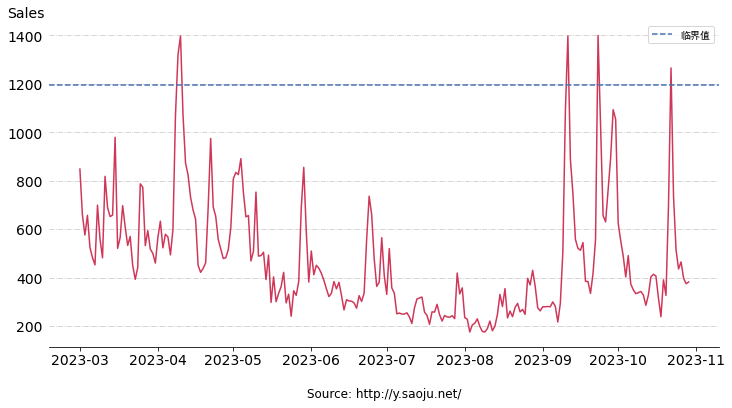

In [11]:
upthreshold = 3*data_out['当日销量（张）'].std()+data_out['当日销量（张）'].mean()
downthreshold = -3*data_out['当日销量（张）'].std()+data_out['当日销量（张）'].mean()
 
plt.figure(figsize=(12, 6))
plt.plot(date_out, data_out['当日销量（张）'], c='#cf3759')
# plt.scatter(datetime(2023, 9, 27), data['当日销量（张）'].max(), c='red',  s=100)
plt.annotate('华晨宇出道十周年纪念日', 
             xy = (datetime(2023, 9, 27), data['当日销量（张）'].max()), 
             xytext=(datetime(2023, 7, 27),0.8*data['当日销量（张）'].max()),
             arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=-0.05",
                    color="k", shrinkA=5, shrinkB=5), fontsize=14)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.yticks(fontsize=14, fontname="Roboto")
plt.xticks(fontsize=14, fontname="Roboto")
plt.tick_params(left = False) #去除y轴小点
plt.gca().set_ylabel('Sales', ha='left', y=1, rotation=0, labelpad=0, fontsize=14, fontname="Roboto")
plt.gca().set_xlabel('Source: http://y.saoju.net/', rotation=0, labelpad=20, fontsize=12, fontname="Roboto")
plt.gca().spines[['right', 'top','left']].set_visible(False)
plt.grid(linestyle='-.',axis='y',color='#ccc')
plt.axhline(y=upthreshold, color='#4771b2', linestyle='--', label='临界值')
# plt.axhline(y=data_out['当日销量（张）'].mean(), color='#4771b2', linestyle='--')
plt.legend()
plt.savefig('threshold.eps',format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


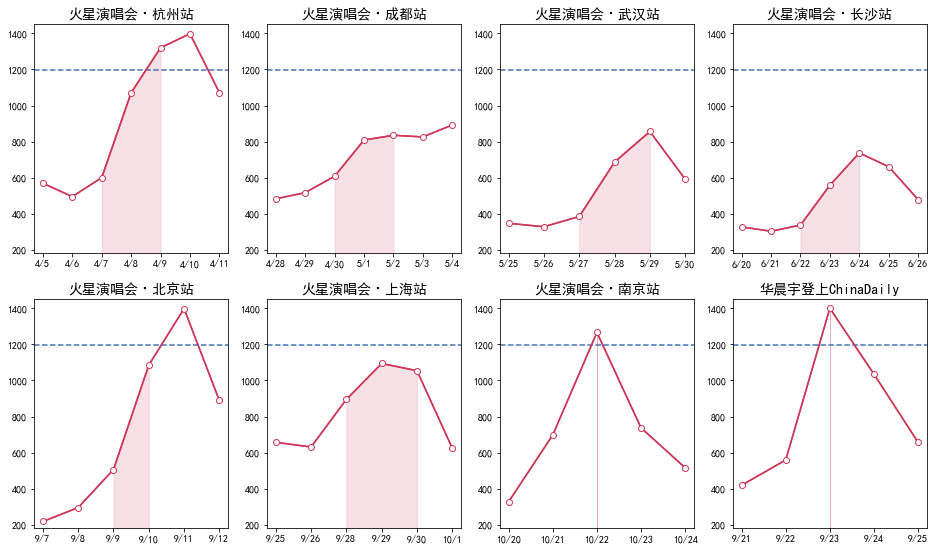

In [14]:
# 第一步：创建一个figure，figsize参数设置figure的长和宽
fig = plt.figure(figsize=(16,8))

# 第二步，创建放置子图的网格，此处是2行3列
gs = fig.add_gridspec(2,4)
# fig, axes = plt.subplots(2, 4, sharex=False, sharey=True, figsize=(12,6),dpi=100)
fig.subplots_adjust(bottom=0.005)

# 第三步，通过“.add_subplot()”逐个创建子图
# 选择网格并新增子图，gs[0,0]表示第1行，第1列的网格
hangzhou = data_out[(data_out.index > 34) & (data_out.index < 42)]
hangzhou_date = [d[5:] for d in hangzhou['日期']]
ax1=fig.add_subplot(gs[0,0])
ax1.plot(hangzhou_date, hangzhou['当日销量（张）'], c='#cf3759')
ax1.axhline(y=upthreshold, color='#4771b2', linestyle='--', label='Threshold')
ax1.set_ylim(180,1450)
ax1.set_xticks(hangzhou_date, fontsize=14, fontname="Roboto")
ax1.set_title('火星演唱会·杭州站', fontsize = 14)
ax1.fill_between(hangzhou_date[2:5], hangzhou['当日销量（张）'][2:5],color='#cf3759',alpha=0.15)
ax1.plot(hangzhou_date, hangzhou['当日销量（张）'], c='#cf3759', marker='o',markerfacecolor='white')
# ax1.axvspan(hangzhou_date[2], hangzhou_date[4], alpha=0.05, color='#cf3759')

# 选择网格并新增子图
chengdu = data_out[(data_out.index > 57) & (data_out.index < 65)]
chengdu_date = [d[5:] for d in chengdu['日期']]
ax2=fig.add_subplot(gs[0,1])
ax2.plot(chengdu_date, chengdu['当日销量（张）'], c='#cf3759')
ax2.axhline(y=upthreshold, color='#4771b2', linestyle='--', label='Threshold')
ax2.set_ylim(180,1450)
ax2.set_title('火星演唱会·成都站', fontsize = 14)
ax2.fill_between(chengdu_date[2:5], chengdu['当日销量（张）'][2:5],color='#cf3759',alpha=0.15)
ax2.plot(chengdu_date, chengdu['当日销量（张）'], c='#cf3759', marker='o',markerfacecolor='white')
# ax2.axvspan(chengdu_date[2], chengdu_date[4], alpha=0.05, color='#cf3759')

# 选择第2列所用行的网格
wuhan = data_out[(data_out.index > 84) & (data_out.index < 91)]
wuhan_date = [d[5:] for d in wuhan['日期']]
ax3=fig.add_subplot(gs[0,2])
ax3.plot(wuhan_date, wuhan['当日销量（张）'], c='#cf3759')
ax3.axhline(y=upthreshold, color='#4771b2', linestyle='--', label='Threshold')
ax3.set_ylim(180,1450)
ax3.set_title('火星演唱会·武汉站',fontsize = 14)
ax3.fill_between(wuhan_date[2:5], wuhan['当日销量（张）'][2:5],color='#cf3759',alpha=0.15)
ax3.plot(wuhan_date, wuhan['当日销量（张）'], c='#cf3759', marker='o',markerfacecolor='white')
# ax3.axvspan(wuhan_date[2], wuhan_date[3], alpha=0.05, color='#cf3759')

# 选择网格并新增子图
changsha = data_out[(data_out.index > 110) & (data_out.index < 118)]
changsha_date = [d[5:] for d in changsha['日期']]
ax4=fig.add_subplot(gs[0,3])
ax4.plot(changsha_date, changsha['当日销量（张）'], c='#cf3759')
ax4.axhline(y=upthreshold, color='#4771b2', linestyle='--', label='Threshold')
ax4.set_ylim(180,1450)
ax4.set_title('火星演唱会·长沙站', fontsize = 14)
ax4.fill_between(changsha_date[2:5], changsha['当日销量（张）'][2:5],color='#cf3759',alpha=0.15)
ax4.plot(changsha_date, changsha['当日销量（张）'], c='#cf3759', marker='o',markerfacecolor='white')
# ax4.axvspan(changsha_date[2], changsha_date[4], alpha=0.05, color='#cf3759')

# 选择网格并新增子图
beijing = data_out[(data_out.index > 189) & (data_out.index < 196)]
beijing_date = [d[5:] for d in beijing['日期']]
ax5=fig.add_subplot(gs[1,0])
ax5.plot(beijing_date, beijing['当日销量（张）'], c='#cf3759')
ax5.axhline(y=upthreshold, color='#4771b2', linestyle='--', label='Threshold')
ax5.set_ylim(180,1450)
ax5.set_title('火星演唱会·北京站', fontsize = 14)
ax5.fill_between(beijing_date[2:4], beijing['当日销量（张）'][2:4],color='#cf3759',alpha=0.15)
ax5.plot(beijing_date, beijing['当日销量（张）'], c='#cf3759', marker='o',markerfacecolor='white')
# ax5.axvspan(beijing_date[2], beijing_date[3], alpha=0.05, color='#cf3759')

shanghai = data_out[(data_out.index > 207) & (data_out.index < 215)]
shanghai_date = [d[5:] for d in shanghai['日期']]
ax6=fig.add_subplot(gs[1,1])
ax6.plot(shanghai_date, shanghai['当日销量（张）'], c='#cf3759')
ax6.axhline(y=upthreshold, color='#4771b2', linestyle='--', label='Threshold')
ax6.set_ylim(180,1450)
ax6.set_title('火星演唱会·上海站', fontsize = 14)
ax6.plot(shanghai_date, shanghai['当日销量（张）'], c='#cf3759', marker='o',markerfacecolor='white')
ax6.fill_between(shanghai_date[2:5], shanghai['当日销量（张）'][2:5],color='#cf3759',alpha=0.15)
# ax6.axvspan(shanghai_date[2], shanghai_date[3], alpha=0.05, color='#cf3759')

nanjing = data_out[(data_out.index > 232) & (data_out.index < 238)]
nanjing_date = [d[5:] for d in nanjing['日期']]
ax7=fig.add_subplot(gs[1,2])
ax7.plot(nanjing_date, nanjing['当日销量（张）'], c='#cf3759')
ax7.axhline(y=upthreshold, color='#4771b2', linestyle='--', label='Threshold')
ax7.set_ylim(180,1450)
ax7.set_title('火星演唱会·南京站', fontsize = 14)
ax7.plot(nanjing_date, nanjing['当日销量（张）'], c='#cf3759', marker='o',markerfacecolor='white')
ax7.fill_between(nanjing_date[2:3], nanjing['当日销量（张）'][2:3],color='#cf3759',alpha=0.4)
# ax7.axvspan(nanjing_date[2], nanjing_date[2], alpha=0.3, color='#cf3759')

chinad = data_out[(data_out.index > 203) & (data_out.index < 209)]
chinad_date = [d[5:] for d in chinad['日期']]
ax8=fig.add_subplot(gs[1,3])
ax8.plot(chinad_date, chinad['当日销量（张）'], c='#cf3759')
ax8.axhline(y=upthreshold, color='#4771b2', linestyle='--', label='Threshold')
ax8.set_ylim(180,1450)
ax8.set_title('华晨宇登上ChinaDaily', fontsize = 14)
ax8.plot(chinad_date, chinad['当日销量（张）'], c='#cf3759', marker='o',markerfacecolor='white')
ax8.fill_between(chinad_date[2:3], chinad['当日销量（张）'][2:3],color='#cf3759',alpha=0.4)
# ax8.axvspan(chinad_date[2], chinad_date[2], alpha=0.3, color='#cf3759')


# 第四步，设置fig的标题，比ax1，ax2，ax3的标题更高一级
# fig.suptitle('AAAAAAAAAAAAAAAAAAAAAAAAA')
plt.savefig('much.eps',format='eps', bbox_inches = 'tight')

# 第五步，展示图
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


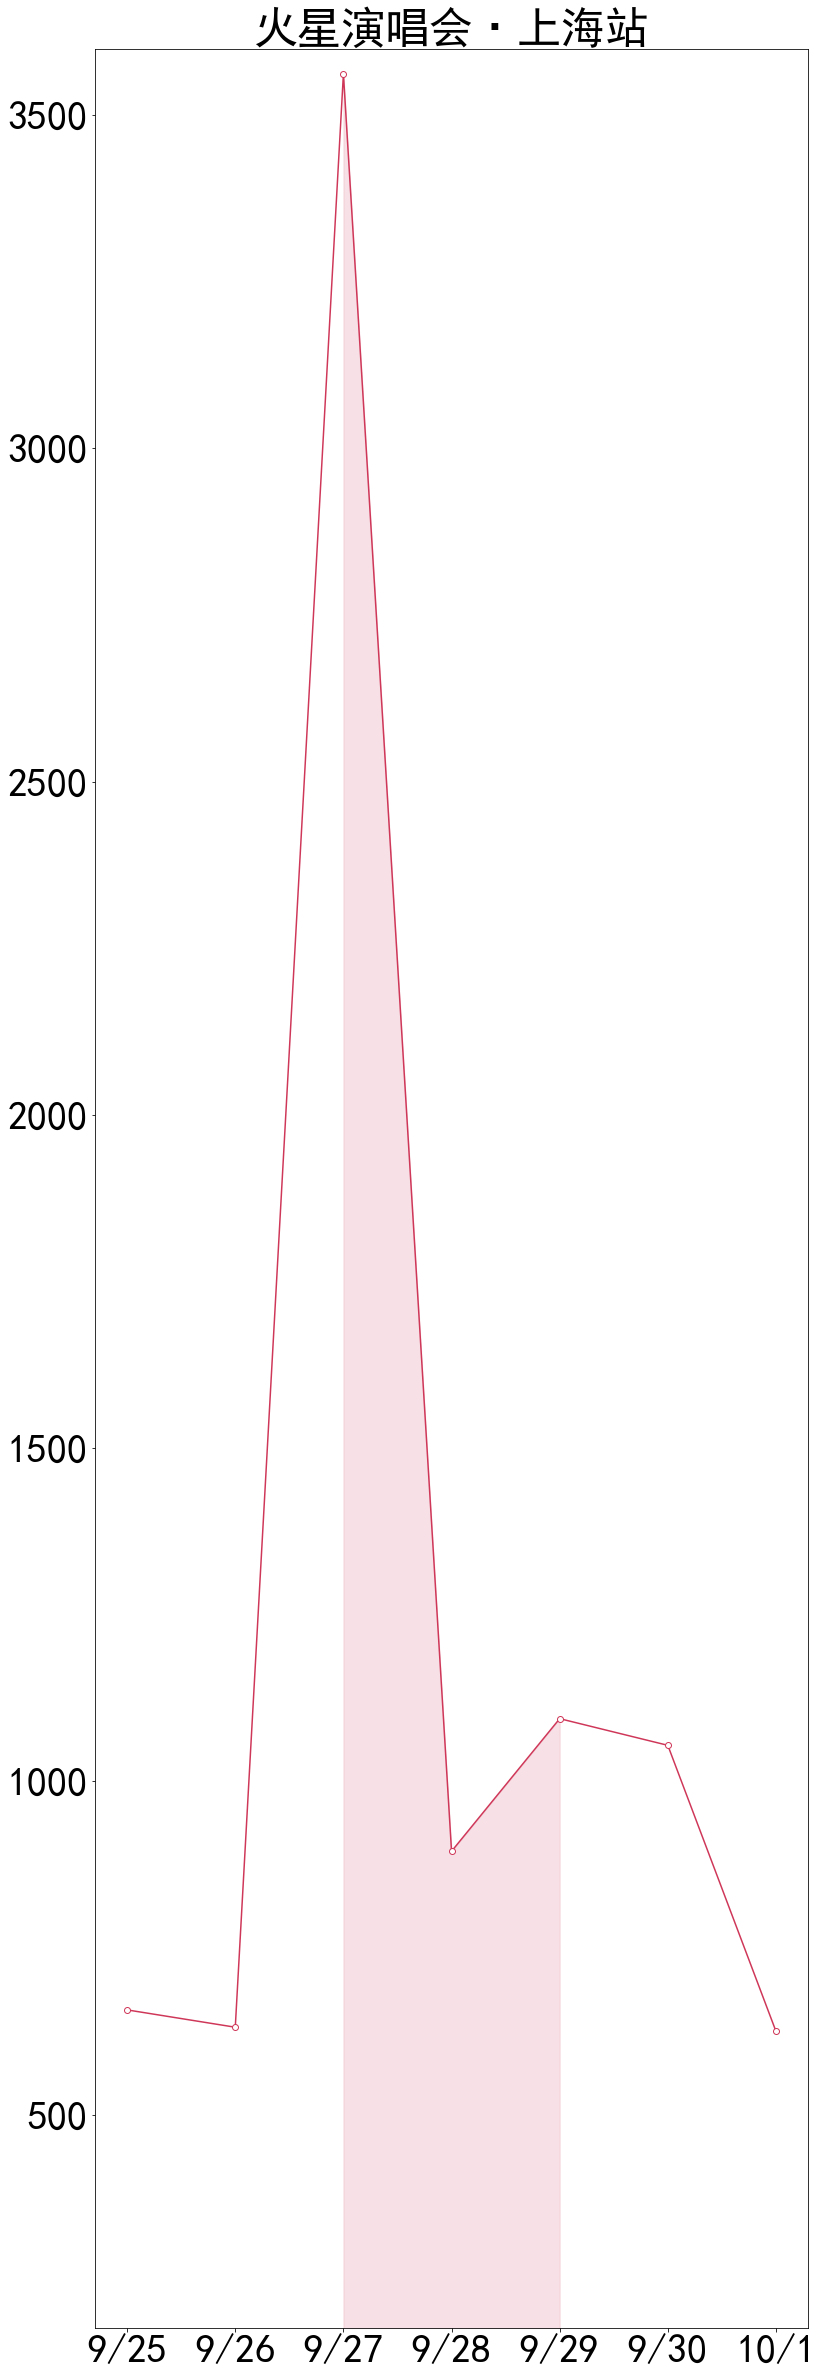

In [45]:
plt.figure(figsize=(127.9/10, 3400*138.12/11200))
plt.plot(shanghai_date, shanghai['当日销量（张）'], c='#cf3759', marker='o',markerfacecolor='white')
plt.ylim(180,3600)
plt.title('火星演唱会·上海站', fontsize = 44)
plt.yticks(size = 40)
plt.xticks(size = 40)
plt.fill_between(shanghai_date[2:5], shanghai['当日销量（张）'][2:5],color='#cf3759',alpha=0.15)
plt.savefig('1122.eps',format='eps', bbox_inches = 'tight')
plt.show()

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(nanjing_date2,nanjing2['当日销量（张）'])
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xlabel('Date')
plt.ylabel('Deviation')
plt.title('Deviation from Moving Average')
plt.xticks(rotation=45)
# plt.axhline(y=0, color='r', linestyle='--', label='Threshold')
# plt.axhline(y=yuzhi3, color='g', linestyle='--')
# plt.axhline(y=yuzhi4, color='g', linestyle='--')
plt.legend()
plt.grid(True)
 
plt.show()

NameError: name 'nanjing_date2' is not defined

<Figure size 864x432 with 0 Axes>

In [90]:
print(nanjing)

             日期  当日销量（张）  当日销量（元）  QQ音乐（张）  QQ音乐（元）  网易云音乐（张）  网易云音乐（元）  \
233  2023/10/20      328     8856        0        0       328      8856   
234  2023/10/21      698    18846        0        0       698     18846   
235  2023/10/22     1266    34182        0        0      1266     34182   
236  2023/10/23      737    19899        0        0       737     19899   
237  2023/10/24      516    13932        0        0       516     13932   
238  2023/10/25      437    11799        0        0       437     11799   

     酷狗音乐（张）  酷狗音乐（元）  酷我音乐（张）  酷我音乐（元）  咪咕音乐（张）  咪咕音乐（元）  
233        0        0        0        0        0        0  
234        0        0        0        0        0        0  
235        0        0        0        0        0        0  
236        0        0        0        0        0        0  
237        0        0        0        0        0        0  
238        0        0        0        0        0        0  


 ## Calculate the moving average（动态阈值）

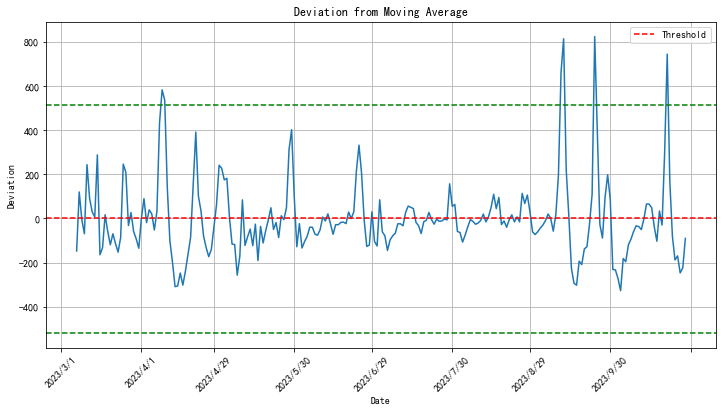

In [14]:
window_size = 7
moving_average = data_out['当日销量（张）'].rolling(window_size).mean()
 
 # Calculate the deviation from the moving average
deviation = data_out['当日销量（张）'] - moving_average

yuzhi1 = moving_average.mean()+moving_average.std()*3
yuzhi2 = moving_average.mean()-moving_average.std()*3

yuzhi3 = deviation.mean()+deviation.std()*3
yuzhi4 = deviation.mean()-deviation.std()*3
    
 # Plot the deviation
plt.figure(figsize=(12, 6))
plt.plot(data_out['日期'],deviation)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xlabel('Date')
plt.ylabel('Deviation')
plt.title('Deviation from Moving Average')
plt.xticks(rotation=45)
plt.axhline(y=0, color='r', linestyle='--', label='Threshold')
plt.axhline(y=yuzhi3, color='g', linestyle='--')
plt.axhline(y=yuzhi4, color='g', linestyle='--')
plt.legend()
plt.grid(True)
 
plt.show()

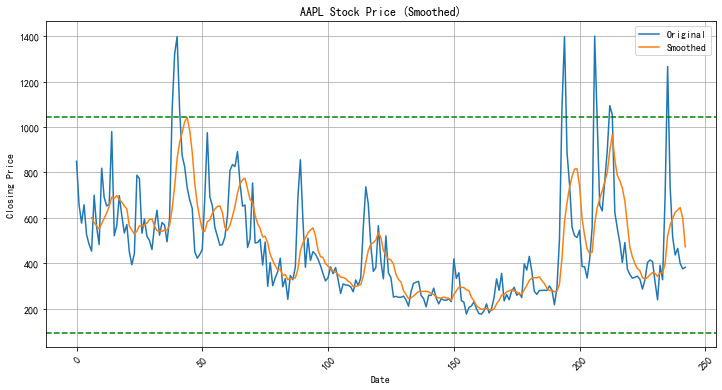

In [15]:
# 不要 也可能要
window_size = 7
data_out['Smoothed'] = data_out['当日销量（张）'].rolling(window_size).mean()
plt.figure(figsize=(12, 6))
plt.plot(data_out['当日销量（张）'], label='Original')
plt.plot(data_out['Smoothed'], label='Smoothed')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('AAPL Stock Price (Smoothed)')
plt.axhline(y=yuzhi1, color='g', linestyle='--')
plt.axhline(y=-yuzhi2, color='g', linestyle='--')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
 
plt.show()

## 机器学习方法

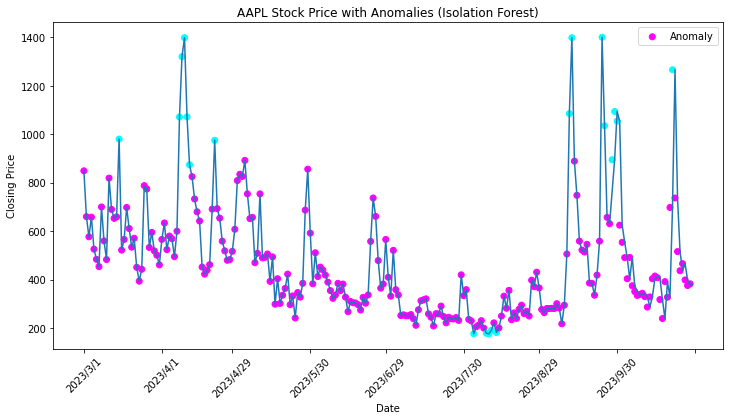

In [16]:
from sklearn.ensemble import IsolationForest
 
 # Prepare the data for Isolation Forest
X = data_out['当日销量（张）'].values.reshape(-1, 1)
 
# Train the Isolation Forest model
model = IsolationForest(contamination=0.08)
model.fit(X)
 
 # Predict the anomalies
anomalies = model.predict(X)
 
 # Plot the anomalies
plt.figure(figsize=(12, 6))
plt.plot(data_out['当日销量（张）'])
plt.scatter(data_out['日期'], data_out['当日销量（张）'], c=anomalies, cmap='cool', label='Anomaly')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('AAPL Stock Price with Anomalies (Isolation Forest)')
plt.xticks(rotation=45)
plt.legend()
# plt.grid(True)
 
plt.show()

## grubbs test 只能确定是否有离群值1

In [19]:
import scipy.stats as stats
import numpy as np

In [20]:
mean = np.mean(X)
stddev = np.std(X, ddof=1)
n = len(X)
alpha = 0.05

# 计算Grubbs值
t_critical = stats.t.ppf(1-alpha/(2*n), n-2)
g = ((n-1)/np.sqrt(n)) * np.sqrt(np.square(t_critical)/(n-2+np.square(t_critical)))                     
grubbs_val = (np.max(X) - mean) / stddev 

In [21]:
t_critical = stats.t.ppf(1-alpha/(2*n), n-2)
c = (n-1)/np.sqrt(n**2) * np.sqrt(np.square(t_critical)/(n-2+np.square(t_critical)))                     

In [22]:
if grubbs_val > c:
    print("存在离群值！")
else:
    print("不存在离群值！")

存在离群值！
